In [16]:
import pandas as pd
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [18]:
import pickle

In [19]:
import seaborn as sns
sns.set_style('whitegrid')

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [21]:
df=pd.read_csv('./input_data/streeteasy.csv')
df.shape

(5000, 20)

In [323]:
df.head(3)

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens


In [23]:
df.describe()


,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df1=df.drop(['rental_id','building_id','neighborhood','submarket','borough'], axis=1)
df1.shape

(5000, 15)

In [26]:

from scipy.stats import pearsonr

# Only compute pearson prod-moment correlations between feature
# columns and target column

target_col_name = 'rent'
feature_target_corr = {}
for col in df1:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = pearsonr(df1[col], df1[target_col_name])[0]
print("Feature-Target Correlations")
print(feature_target_corr)

Feature-Target Correlations
{'bedrooms_rent': 0.5311996048419936, 'bathrooms_rent': 0.733644385958095, 'size_sqft_rent': 0.8087835060658337, 'min_to_subway_rent': 0.0036521780441398886, 'floor_rent': 0.27235110961903825, 'building_age_yrs_rent': -0.12230176787016711, 'no_fee_rent': -0.0917686661124795, 'has_roofdeck_rent': 0.08128581242564491, 'has_washer_dryer_rent': 0.09613579336080944, 'has_doorman_rent': 0.09910576451195674, 'has_elevator_rent': 0.12082247639143566, 'has_dishwasher_rent': 0.09663128585690411, 'has_patio_rent': 0.05825967504830641, 'has_gym_rent': 0.0937368687555624}


In [27]:
df.corr()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rental_id,1.000000,-0.005627,-0.142801,-0.035035,-0.106741,-0.080647,0.009344,-0.095590,0.047474,0.036605,-0.034081,-0.072351,-0.066153,-0.070506,-0.036664,-0.008090,-0.032547
building_id,-0.005627,1.000000,-0.001235,0.007502,-0.014055,-0.002570,-0.059641,0.015090,-0.036225,-0.019666,0.007928,0.000589,0.027252,0.018778,0.026607,-0.005895,0.016330
rent,-0.142801,-0.001235,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302,-0.091769,0.081286,0.096136,0.099106,0.120822,0.096631,0.058260,0.093737
bedrooms,-0.035035,0.007502,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329,-0.067047,-0.012395,-0.002582,-0.034031,-0.027457,-0.007094,0.003772,-0.018393
bathrooms,-0.106741,-0.014055,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050,-0.052726,0.044597,0.052827,0.044997,0.051410,0.060295,0.057091,0.057221
size_sqft,-0.080647,-0.002570,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434,-0.129534,0.038302,0.052746,0.046402,0.060830,0.063051,0.036600,0.047815
min_to_subway,0.009344,-0.059641,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273,0.054977,-0.021765,-0.017840,-0.006722,-0.014314,-0.022058,-0.005652,-0.014924
floor,-0.095590,0.015090,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757,0.088094,0.079554,0.060379,0.123108,0.109258,0.036979,0.068119,0.089361
building_age_yrs,0.047474,-0.036225,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000,-0.213815,-0.055064,-0.031511,-0.058163,-0.067261,-0.040078,-0.048155,-0.063687
no_fee,0.036605,-0.019666,-0.091769,-0.067047,-0.052726,-0.129534,0.054977,0.088094,-0.213815,1.000000,-0.089593,-0.082366,-0.175022,-0.155638,-0.086081,-0.052192,-0.105797


In [28]:
df['bedrooms'].value_counts().sort_index()

0.0     832
0.5      26
1.0    2048
1.5      28
2.0    1438
2.5      15
3.0     496
3.5       5
4.0     103
4.5       1
5.0       8
Name: bedrooms, dtype: int64

In [29]:
df['bathrooms'].value_counts().sort_index()

0      18
1    3572
2    1212
3     182
4      14
5       2
Name: bathrooms, dtype: int64

In [30]:
cat_cols=['no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio',
          'has_gym','neighborhood','submarket','borough']

In [31]:
for col in cat_cols:
    print(col + '\n')
    print(df[col].value_counts().sort_index())
    
    print('\n\n')

no_fee

0    2852
1    2148
Name: no_fee, dtype: int64



has_roofdeck

0    4357
1     643
Name: has_roofdeck, dtype: int64



has_washer_dryer

0    4331
1     669
Name: has_washer_dryer, dtype: int64



has_doorman

0    3860
1    1140
Name: has_doorman, dtype: int64



has_elevator

0    3800
1    1200
Name: has_elevator, dtype: int64



has_dishwasher

0    4222
1     778
Name: has_dishwasher, dtype: int64



has_patio

0    4772
1     228
Name: has_patio, dtype: int64



has_gym

0    4281
1     719
Name: has_gym, dtype: int64



neighborhood

Astoria               132
Battery Park City     104
Bay Ridge              15
Bedford-Stuyvesant     53
Boerum Hill            15
                     ... 
West Village           67
Williamsburg          306
Windsor Terrace         8
Woodhaven               1
Woodside                4
Name: neighborhood, Length: 93, dtype: int64



submarket

All Downtown           1229
All Midtown            1001
All Upper East Side     505
All Upper Manha

In [32]:
num_cols=['rent','size_sqft','min_to_subway','floor','building_age_yrs']

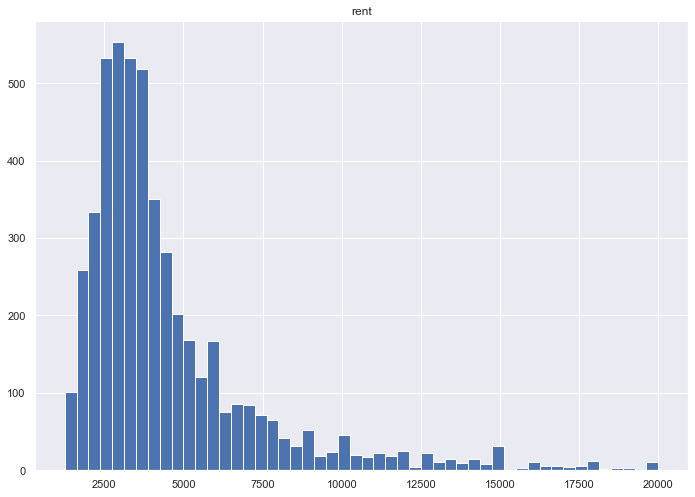

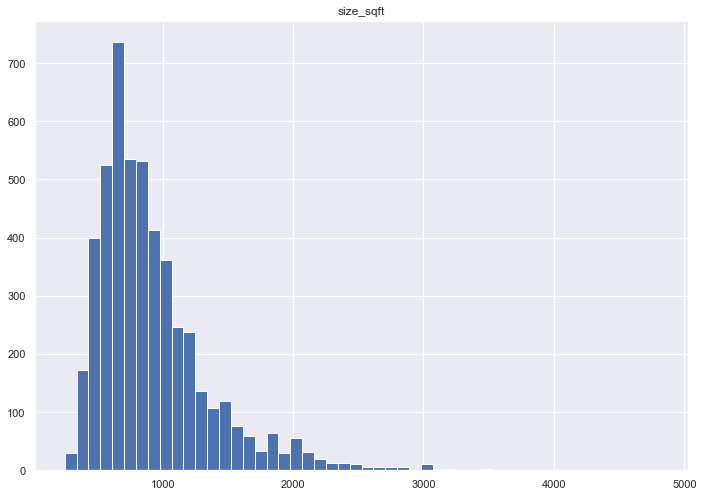

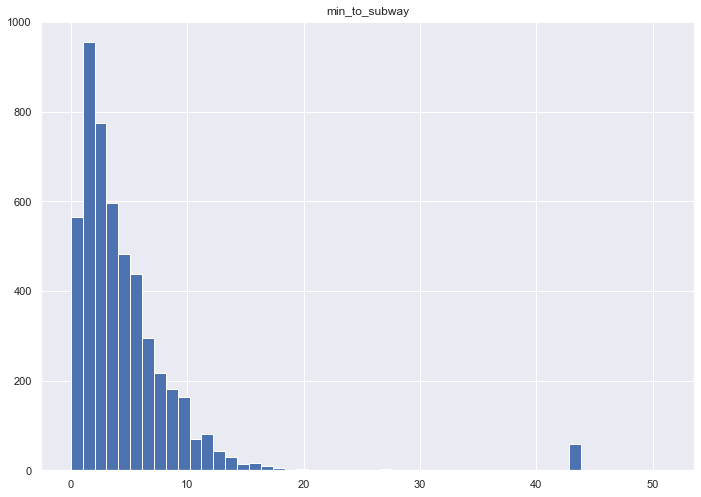

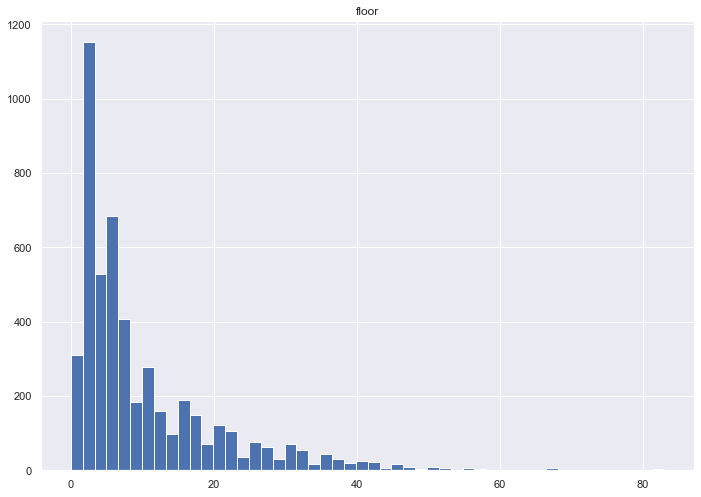

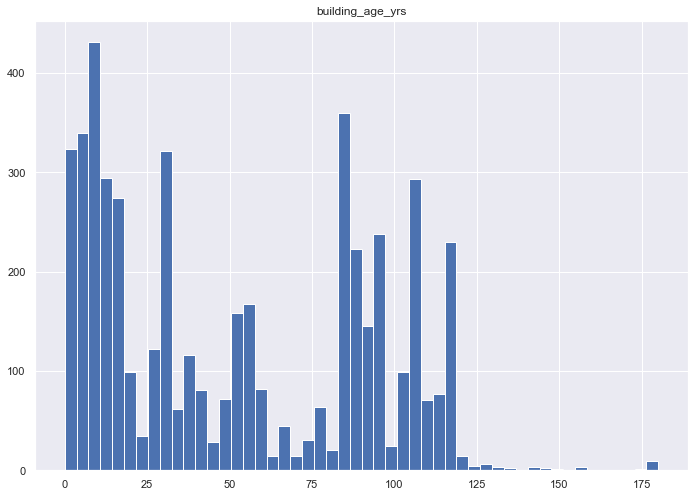

In [33]:
for col in num_cols:
    fig,ax=plt.subplots()
    df[col].hist(ax=ax, bins=50)
    ax.set_title(col)

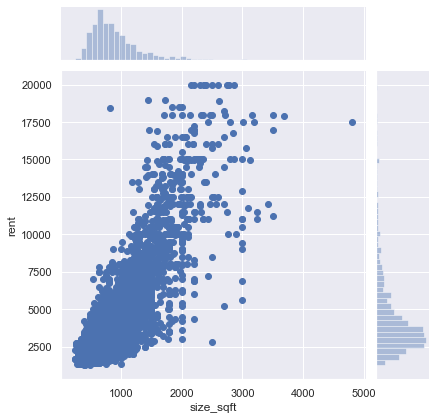

In [34]:
sns.jointplot(x ='size_sqft', y='rent', data=df)


# Model

In [35]:
X_df = df.drop(columns = ['rental_id', 'building_id', 'rent'])

In [36]:
y=df['rent']

In [37]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_df, y, test_size=0.2, random_state=1)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train[['size_sqft']], y_train)
predictions_not_w = model.predict(X_train[['size_sqft']])

In [39]:
predictions_not_w

array([2277.11616319, 6064.1372838 , 1005.75907271, ..., 3900.12521488,
       2709.91857698, 6605.14030102])

In [40]:
prediction_error=predictions_not_w-y_train

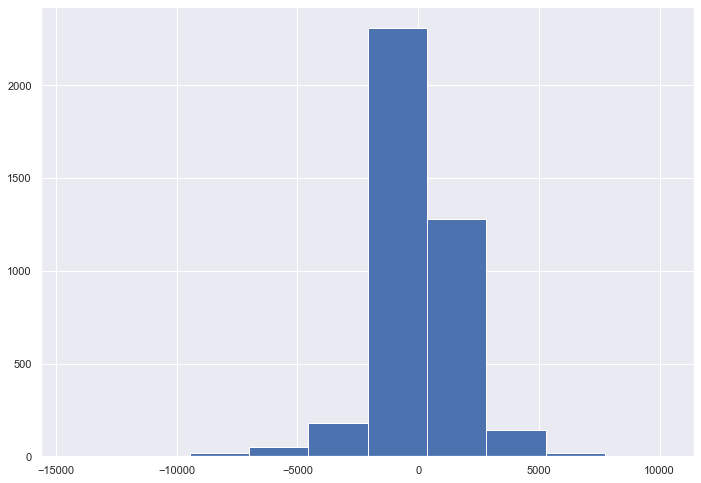

In [41]:

fig,ax=plt.subplots()
prediction_error.hist(ax=ax, bins=10)
#ax.set_title(prediction_error)

# winsorize

In [42]:
from scipy.stats import mstats
import timeit

#data = pd.Series(range(20), dtype='float')

def WinsorizeCustom(data):
    quantiles = data.quantile([0.05, 0.95])
    q_05 = quantiles.loc[0.05]
    q_95 = quantiles.loc[0.95]

    out = np.where(data.values <= q_05,q_05, 
                                      np.where(data >= q_95, q_95, data)
                  )
    return out

In [321]:
quantiles = X_train['size_sqft'].quantile([0.05, 0.95])
q_05 = quantiles.loc[0.05]
q_95 = quantiles.loc[0.95]
print(q_05, q_95)

450.0 1800.0


In [43]:
X_train['size_sqft_w']= WinsorizeCustom(X_train['size_sqft'])

<ipython-input-43-80fb94a19f38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['size_sqft_w']= WinsorizeCustom(X_train['size_sqft'])


In [44]:
y_train_w = WinsorizeCustom(y_train)

In [45]:
model = LinearRegression()
model.fit(X_train[['size_sqft_w']], y_train_w)
predictions = model.predict(X_train[['size_sqft']])

In [46]:
prediction_error=predictions-y_train

In [47]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_train, predictions)
r2 = model.score(X_train[['size_sqft_w']], y_train)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 2951777.0474380427, R2: 0.5959557995138643


In [235]:
from sklearn.metrics import mean_squared_error, r2_score

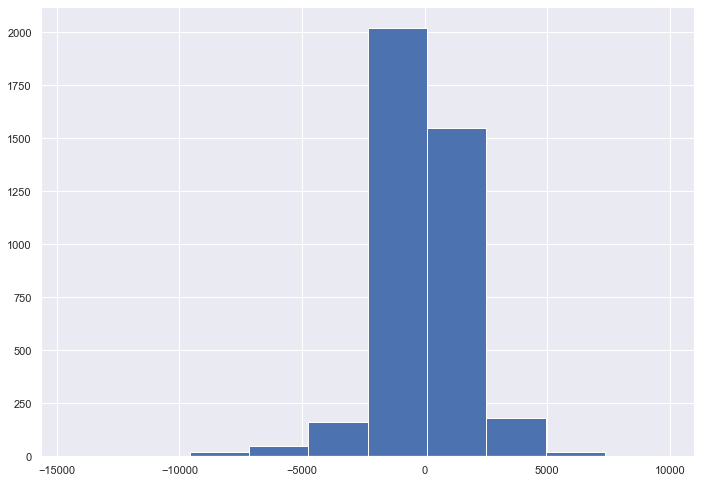

In [48]:
fig,ax=plt.subplots()
prediction_error.hist(ax=ax, bins=10)

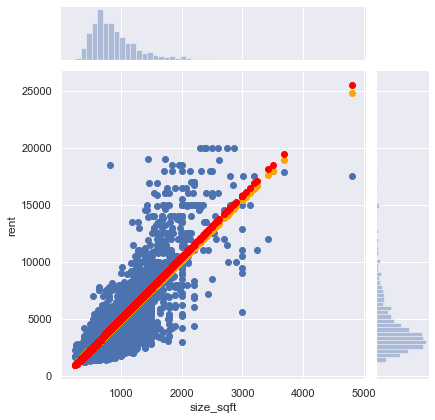

In [49]:
plot = sns.jointplot(x =X_train['size_sqft'], y=y_train)
plot.ax_joint.scatter(X_train['size_sqft'], predictions,  c='orange')
plot.ax_joint.scatter(X_train['size_sqft'], predictions_not_w,c='red')

In [50]:
predictions

array([2292.73473176, 5956.86388815, 1062.63422926, ..., 3863.07579879,
       2711.49234964, 6480.31091049])

# Are boroughs helpful?

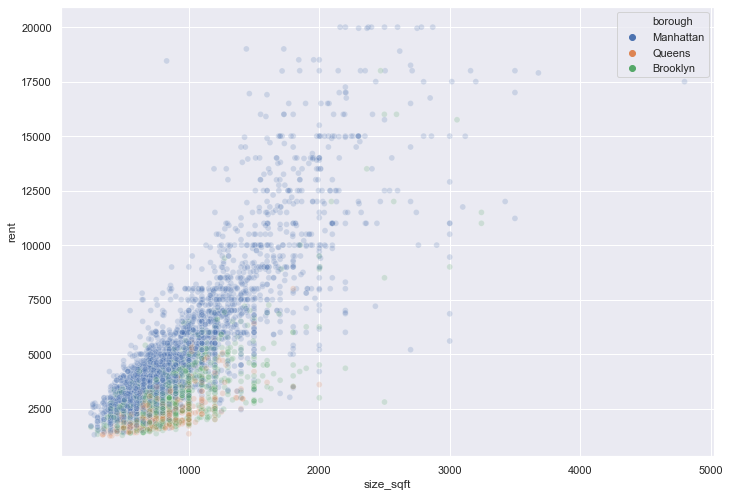

In [51]:
sns.scatterplot(x ='size_sqft', y='rent', data=df, hue = 'borough', alpha = 0.2)


# Manhattan

In [52]:
X_train_M = X_train.iloc[np.where(X_train.borough=='Manhattan')]

In [53]:
X_train_M.head(2)

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,size_sqft_w
1233,0.0,1,500,1,11.0,29,0,0,0,0,0,0,0,0,Tribeca,All Downtown,Manhattan,500.0
1056,2.0,2,1200,2,10.0,105,0,0,1,0,0,1,1,0,Upper West Side,All Upper West Side,Manhattan,1200.0


In [54]:
y_M_w = y_train_w[np.where(X_train.borough=='Manhattan')]
y_M = y_train.iloc[np.where(X_train.borough=='Manhattan')]

In [98]:
model_M = LinearRegression()
model_M.fit(X_train_M[['size_sqft_w']], y_M_w)
predictions_M = model_M.predict(X_train_M[['size_sqft']])

In [99]:
filename='Manhattan_model.pkl'
pickle.dump(model_M, open(filename, 'wb'))
 

In [100]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train_M[['size_sqft_w']], y_M)

In [101]:
predictions_M_error =predictions_M -y_M

In [102]:
predictions_M_error

1233    -394.925957
1056    2911.379449
1686   -1283.007058
3840   -1389.773401
1525       5.074043
           ...     
4225    1208.831958
144    -1116.746270
2895     851.347788
2763    1805.726746
3980     122.080375
Name: rent, Length: 2834, dtype: float64

In [103]:
manhattan_error = pd.Series(predictions_M_error, index = X_train.iloc[np.where(X_train.borough=='Manhattan')].index)

In [104]:
manhattan_error.head()

1233    -394.925957
1056    2911.379449
1686   -1283.007058
3840   -1389.773401
1525       5.074043
Name: rent, dtype: float64

In [105]:
manhattan_error.shape

(2834,)

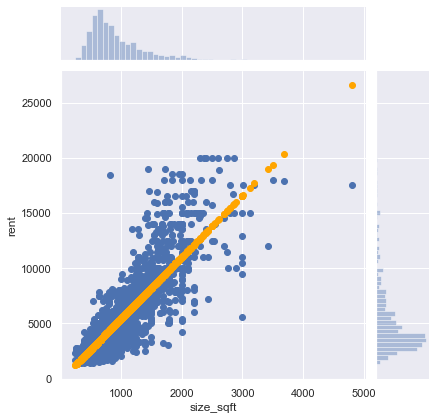

In [106]:
plot = sns.jointplot(x =X_train_M['size_sqft'], y=y_M)
plot.ax_joint.scatter(X_train_M['size_sqft'], predictions_M,  c='orange')

# Queens

In [107]:
X_train_Q = X_train.iloc[np.where(X_train.borough=='Queens')]

In [108]:
X_train_Q.head(2)

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,size_sqft_w
187,2.0,1,891,6,2.0,54,1,0,0,0,0,0,0,0,Kew Gardens,Northeast Queens,Queens,891.0
4634,1.0,1,700,3,1.0,8,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens,700.0


In [109]:
y_Q_w = y_train_w[np.where(X_train.borough=='Queens')]
y_Q = y_train.iloc[np.where(X_train.borough=='Queens')]

In [110]:
model_Q = LinearRegression()
model_Q.fit(X_train_Q[['size_sqft_w']], y_Q_w)
predictions_Q = model_Q.predict(X_train_Q[['size_sqft']])

In [111]:
filename='Queens_model.pkl'
pickle.dump(model_Q, open(filename, 'wb'))

In [112]:
predictions_Q_error =predictions_Q -y_Q

In [113]:
queens_error = pd.Series(predictions_Q_error, index = X_train.iloc[np.where(X_train.borough=='Queens')].index)
queens_error.head()

187     681.899723
4634    341.541128
1123    751.541128
4127   -499.425155
3269   -199.746095
Name: rent, dtype: float64

In [71]:
queens_error.shape

(362,)

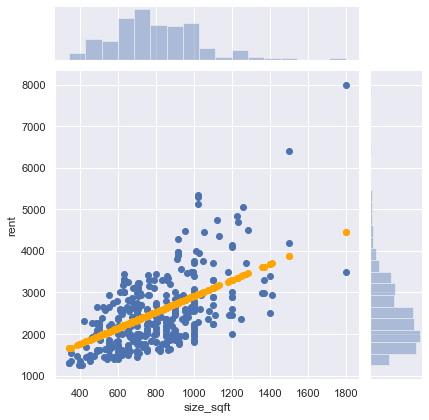

In [114]:
plot = sns.jointplot(x =X_train_Q['size_sqft'], y=y_Q)
plot.ax_joint.scatter(X_train_Q['size_sqft'], predictions_Q,  c='orange')

# Brooklyn

In [115]:
X_train_B= X_train.iloc[np.where(X_train.borough=='Brooklyn')]


In [116]:
X_train_B.head(2)

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough,size_sqft_w
3353,2.0,2,900,3,2.0,116,1,0,0,0,0,0,0,0,Boerum Hill,Northwest Brooklyn,Brooklyn,900.0
128,2.0,2,1251,5,4.0,8,0,1,1,0,0,1,0,0,Williamsburg,North Brooklyn,Brooklyn,1251.0


In [117]:
y_B_w = y_train_w[np.where(X_train.borough=='Brooklyn')]
y_B = y_train.iloc[np.where(X_train.borough=='Brooklyn')]

In [118]:
model_B = LinearRegression()
model_B.fit(X_train_B[['size_sqft_w']], y_B_w)
predictions_B = model_B.predict(X_train_B[['size_sqft']])

In [119]:
filename='Brooklyn_model.pkl'
pickle.dump(model_B, open(filename, 'wb'))

In [120]:
predictions_B_error =predictions_B -y_B

In [121]:
brooklyn_error = pd.Series(predictions_B_error, index = X_train.iloc[np.where(X_train.borough=='Brooklyn')].index)
brooklyn_error.head()

3353    -529.036034
128     -540.725799
4017    -494.494456
1739   -1091.674627
2588    1201.534328
Name: rent, dtype: float64

In [80]:
brooklyn_error.shape

(804,)

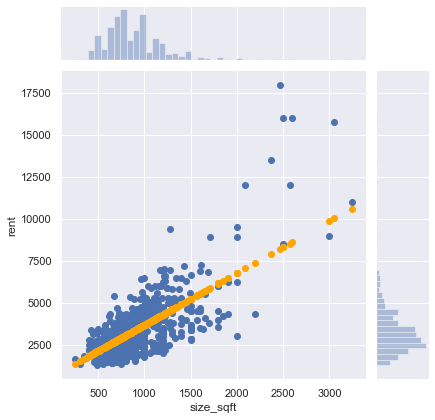

In [122]:
plot = sns.jointplot(x =X_train_B['size_sqft'], y=y_B)
plot.ax_joint.scatter(X_train_B['size_sqft'], predictions_B,  c='orange')

# Append predictions

In [123]:
manhattan_predictions = pd.Series(predictions_M, index = X_train.iloc[np.where(X_train.borough=='Manhattan')].index)
queens_predictions = pd.Series(predictions_Q, index = X_train.iloc[np.where(X_train.borough=='Queens')].index)
brooklyn_predictions = pd.Series(predictions_B, index = X_train.iloc[np.where(X_train.borough=='Brooklyn')].index)

In [124]:
borough_preds =manhattan_predictions.append(queens_predictions, verify_integrity=True)
borough_preds=borough_preds.append(brooklyn_predictions, verify_integrity=True)


In [125]:
borough_preds.shape

(4000,)

# Append errors

In [126]:
borough_error=manhattan_error.append(queens_error, verify_integrity=True)

In [127]:
borough_error.shape


(3196,)

In [128]:
borough_error=borough_error.append(brooklyn_error, verify_integrity=True)

In [129]:
borough_error.shape

(4000,)

In [130]:
(borough_error**2).sum()

8764320434.55877

In [131]:
(prediction_error**2).sum()

11807108189.75217

In [132]:
prediction_error.sort_index()

0       -361.954673
1      -1355.559933
2       1909.969843
3        -29.725655
4        -15.891912
           ...     
4994   -1749.762221
4995     616.346193
4996   -1827.843799
4998    -391.860265
4999    -553.172678
Name: rent, Length: 4000, dtype: float64

# Next best variable

In [133]:
joined_train = X_train.copy()
joined_train['target'] = borough_error
del joined_train['size_sqft_w']
del joined_train['size_sqft']
del joined_train['borough']

In [134]:
borough_error

1233    -394.925957
1056    2911.379449
1686   -1283.007058
3840   -1389.773401
1525       5.074043
           ...     
4453    1148.138806
1202    -820.400639
3462      62.328572
905      463.328572
235      -94.494456
Name: rent, Length: 4000, dtype: float64

In [93]:
joined_train.shape

(4000, 16)

In [135]:
joined_train.head(3)

,bedrooms,bathrooms,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,target
1233,0.0,1,1,11.0,29,0,0,0,0,0,0,0,0,Tribeca,All Downtown,-394.925957
1056,2.0,2,2,10.0,105,0,0,1,0,0,1,1,0,Upper West Side,All Upper West Side,2911.379449
1686,0.0,1,9,7.0,0,1,0,0,0,0,0,0,0,Midtown East,All Midtown,-1283.007058


In [136]:
joined_train.corr().abs().loc['target'].sort_values()

has_patio           0.017976
bedrooms            0.019087
min_to_subway       0.022740
has_doorman         0.034489
has_dishwasher      0.035024
has_gym             0.046914
has_elevator        0.047727
has_roofdeck        0.051215
has_washer_dryer    0.051626
no_fee              0.056439
bathrooms           0.196648
floor               0.259399
building_age_yrs    0.278164
target              1.000000
Name: target, dtype: float64

# building_age_yrs

In [151]:
joined_train['winsorized_target'] = WinsorizeCustom(joined_train['target'])
joined_train['building_age_yrs_w'] = WinsorizeCustom(joined_train['building_age_yrs'])
joined_train['floor_w'] = WinsorizeCustom(joined_train['floor'])

In [153]:
model_1 = LinearRegression()
model_1.fit(joined_train[['building_age_yrs_w', 'floor_w']], joined_train.winsorized_target)
predictions_1 = model_1.predict(joined_train[['building_age_yrs_w', 'floor_w']])

In [154]:
predictions_1_error = joined_train.target - predictions_1

In [155]:
(predictions_1_error**2).sum()


7880618332.583764

In [156]:
total_preds=predictions_1 + borough_preds

In [157]:
total_error = y_train-total_preds

In [158]:
(total_error**2).sum()

9321248635.793856

In [172]:
import statsmodels.formula.api as sm

In [160]:
X_train['building_age_yrs_w'] = WinsorizeCustom(X_train['building_age_yrs'])
X_train['floor_w'] = WinsorizeCustom(X_train['floor'])

<ipython-input-160-f8cdc173699f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['building_age_yrs_w'] = WinsorizeCustom(X_train['building_age_yrs'])
<ipython-input-160-f8cdc173699f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['floor_w'] = WinsorizeCustom(X_train['floor'])


In [162]:
joined_train_2 = X_train.copy()
joined_train_2['rent'] = y_train
joined_train_2['rent_w'] = y_train_w

In [169]:
joined_train_2['borough_cat'] = pd.Categorical(joined_train_2.borough)

In [180]:
mod = sm.ols('rent_w ~ size_sqft_w + building_age_yrs_w + floor_w + C(borough_cat)', data = joined_train_2).fit()

In [236]:
mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.777     
Dependent Variable:       rent_w                AIC:                     67466.2346
Date:                     2020-12-31 12:35      BIC:                     67503.9989
No. Observations:         4000                  Log-Likelihood:          -33727.   
Df Model:                 5                     F-statistic:             2794.     
Df Residuals:             3994                  Prob (F-statistic):      0.00      
R-squared:                0.778                 Scale:                   1.2357e+06
-----------------------------------------------------------------------------------
                              Coef.   Std.Err.    t     P>|t|    [0.025     0.975] 
-----------------------------------------------------------------------------------
Intercept                   -903.7878  66.1936 -13.6537 0.0000 -1033.5641 -774.0114
C(borough_cat)[T.Manhattan] 1281.2022  45.9147  27.9040 0.0000  1191.1839 1371.2206
C(borough_cat)[T.Queens]    -406.7202  70.6124  -5.7599 0.0000  -545.1600 -268.2804
size_sqft_w                    5.0384   0.0487 103.5340 0.0000     4.9430    5.1338
building_age_yrs_w            -7.0064   0.4833 -14.4978 0.0000    -7.9539   -6.0589
floor_w                       25.2777   2.1753  11.6205 0.0000    21.0129   29.5424
-----------------------------------------------------------------------------------
Omnibus:                    229.334            Durbin-Watson:               2.055  
Prob(Omnibus):              0.000              Jarque-Bera (JB):            922.770
Skew:                       0.090              Prob(JB):                    0.000  
Kurtosis:                   5.346              Condition No.:               4724   
===================================================================================
* The condition number is large (5e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [181]:
predictions_2 = mod.predict(joined_train_2)

In [226]:
np.sqrt((predictions_2 - joined_train_2.rent).pow(2).mean())

1610.9529145164029

In [233]:
np.sqrt((joined_train_2.rent - borough_preds).pow(2).mean())

1480.2297485997528

In [228]:
mean_squared_error(joined_train_2.rent, predictions_2,squared=False)

1610.9529145164036

In [229]:
mean_squared_error(joined_train_2.rent, borough_preds, squared=False)

3781.8586155446287

Text(0.5, 1.0, 'Regressions Compare')

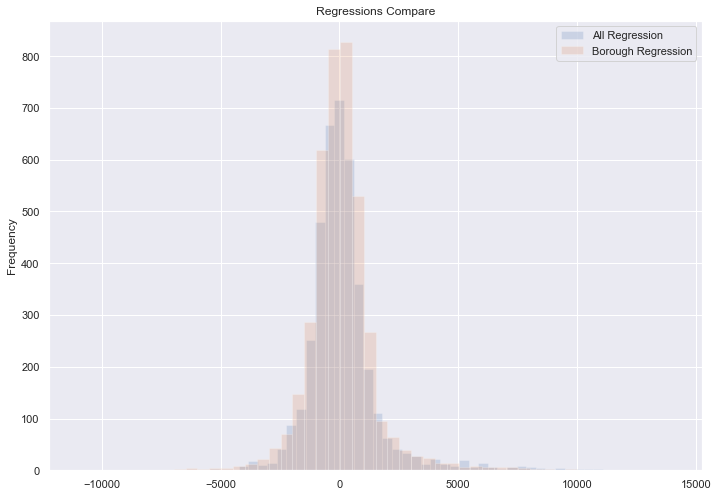

In [206]:
fig,ax=plt.subplots()
(y_train - predictions_2).plot(ax=ax, kind = 'hist', bins=50, alpha = 0.2, label = 'All Regression')
(y_train - borough_preds).plot(ax=ax, kind = 'hist', bins=50, alpha = 0.2, label = 'Borough Regression')
ax.legend()
ax.set_title('Regressions Compare')

In [186]:
mean_squared_error(y_train, borough_preds)

14302454.587969135

In [182]:
predictions_2_error = y_train - predictions_2

In [183]:
(predictions_2_error**2).sum()

10380677171.15558

In [184]:
(borough_error**2).sum()

8764320434.55877

# Do boroughs treat age and floor differently

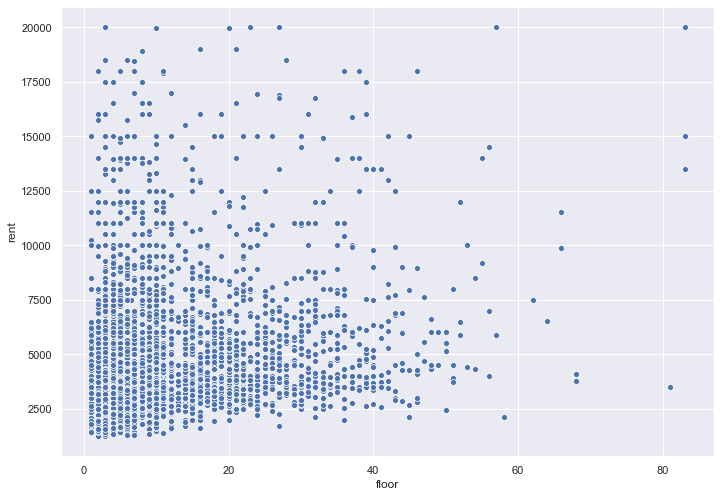

In [240]:
sns.scatterplot(x ='floor', y='rent', data=joined_train_2)


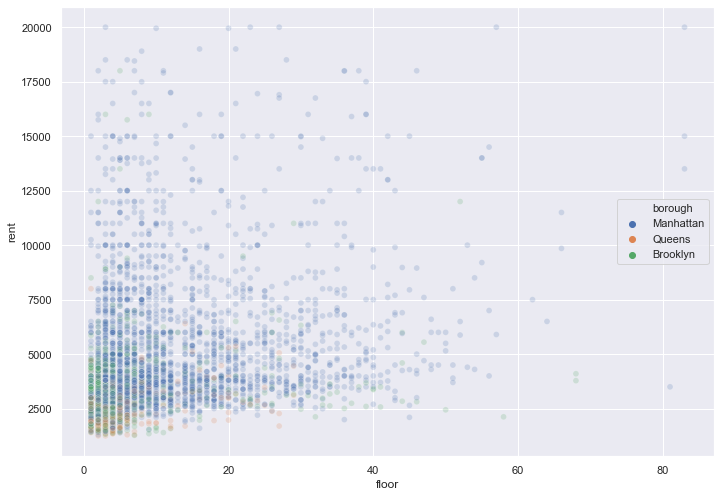

In [241]:
sns.scatterplot(x ='floor', y='rent', data=joined_train_2, hue = 'borough', alpha = 0.2)


In [244]:
joined_train_2.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym',
       'neighborhood', 'submarket', 'borough', 'size_sqft_w',
       'building_age_yrs_w', 'floor_w', 'rent', 'rent_w', 'borough_cat'],
      dtype='object')

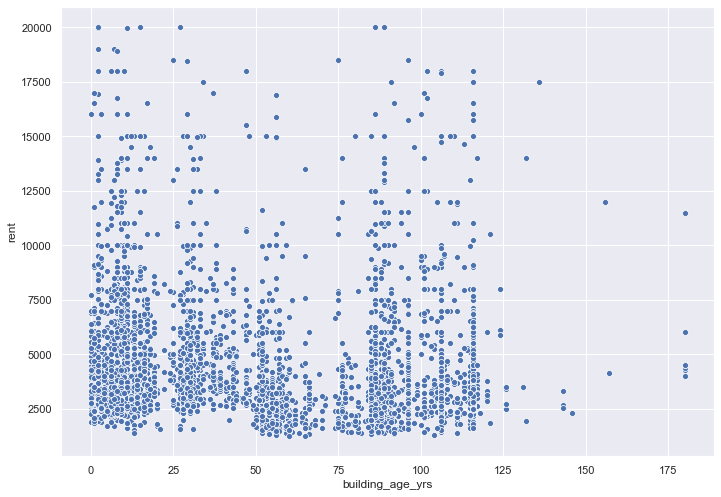

In [245]:
sns.scatterplot(x ='building_age_yrs', y='rent', data=joined_train_2)


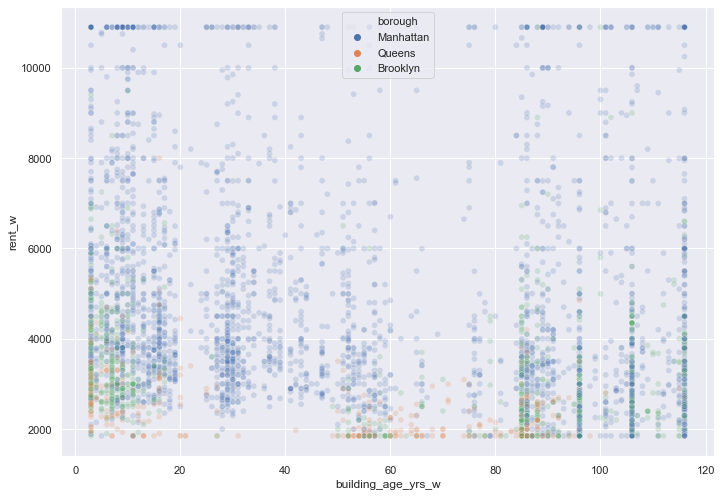

In [248]:
sns.scatterplot(x ='building_age_yrs_w', y='rent_w', data=joined_train_2, hue = 'borough', alpha = 0.2)


In [271]:
sm.mixedlm?

In [290]:
model_mixed = sm.mixedlm('rent_w ~ size_sqft', groups = 'borough', re_formula='0 + size_sqft', data = joined_train_2).fit()

C:\Users\sumita\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\sumita\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


In [291]:
model_mixed.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:             MixedLM Dependent Variable: rent_w      
No. Observations:  4000    Method:             REML        
No. Groups:        3       Scale:              1403078.2022
Min. group size:   362     Log-Likelihood:     -33987.8999 
Max. group size:   2834    Converged:          Yes         
Mean group size:   1333.3                                  
-----------------------------------------------------------
               Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept     704.588   44.414 15.864 0.000 617.538 791.637
size_sqft       3.228    0.667  4.842 0.000   1.921   4.535
size_sqft Var   1.325    0.001                             
===========================================================

"""

In [292]:
model_mixed.random_effects


{'Brooklyn': size_sqft   -0.306759
 dtype: float64,
 'Manhattan': size_sqft    1.272163
 dtype: float64,
 'Queens': size_sqft   -0.965404
 dtype: float64}

In [293]:
predictions_mixed = model_mixed.predict(joined_train_2)

Text(0.5, 1.0, 'Regressions Compare')

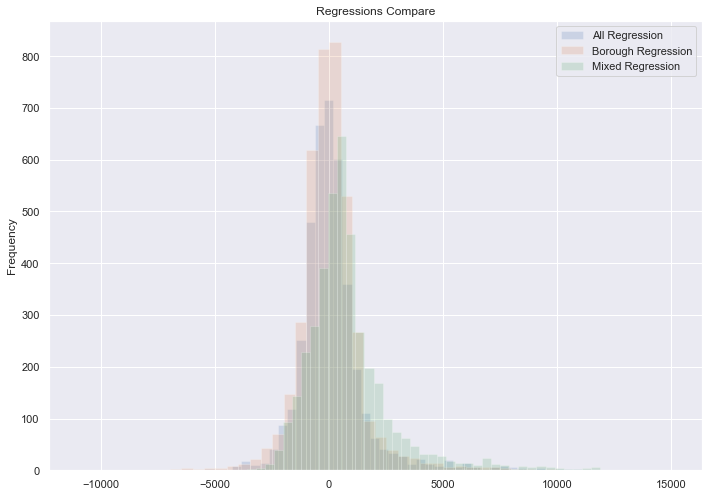

In [294]:
fig,ax=plt.subplots()
(y_train - predictions_2).plot(ax=ax, kind = 'hist', bins=50, alpha = 0.2, label = 'All Regression')
(y_train - borough_preds).plot(ax=ax, kind = 'hist', bins=50, alpha = 0.2, label = 'Borough Regression')
(y_train - predictions_mixed).plot(ax=ax, kind = 'hist', bins=50, alpha = 0.2, label = 'Mixed Regression')
ax.legend()
ax.set_title('Regressions Compare')

In [295]:
mean_squared_error(y_train, predictions_mixed, squared = False)

2141.4108011292733

## Boroughwise with 3

In [322]:
model_dict_borough = {}
for borough in X_train.borough.unique():
    indexer = np.where(X_train.borough == borough)
    X_train_B= X_train.iloc[indexer]
    y_B_w = y_train_w[indexer]
    y_B = y_train.iloc[indexer]
    
    model_B = LinearRegression()
    model_B.fit(X_train_B[['size_sqft_w', 'building_age_yrs', 'floor']], y_B_w)
    
    model_dict_borough[borough] = model_B
    
    filename = f'models/{borough.capitalize()}_model_2.pkl'
    pickle.dump(model_B, open(filename, 'wb'))

In [297]:
model_B.predict?

In [302]:
X_train.iloc[0][['size_sqft_w', 'building_age_yrs', 'floor']].values.reshape(1,-1)

array([[500.0, 29, 11.0]], dtype=object)

In [303]:
def borough_apply(row):
    return model_dict_borough[row['borough']].predict(row[['size_sqft_w', 'building_age_yrs', 'floor']].values.reshape(1,-1))

In [305]:
predictions_borough_2 = X_train.apply(borough_apply, axis = 1)

In [318]:
np.array(predictions_borough_2.tolist()).reshape((4000))

array([2780.40041079, 6067.29257796, 2645.5732125 , ..., 2647.06905012,
       3208.78770574, 4399.802047  ])

In [306]:
mean_squared_error(y_train, predictions_borough_2, squared = False)

1543.4291354671088

Text(0.5, 1.0, 'Regressions Compare')

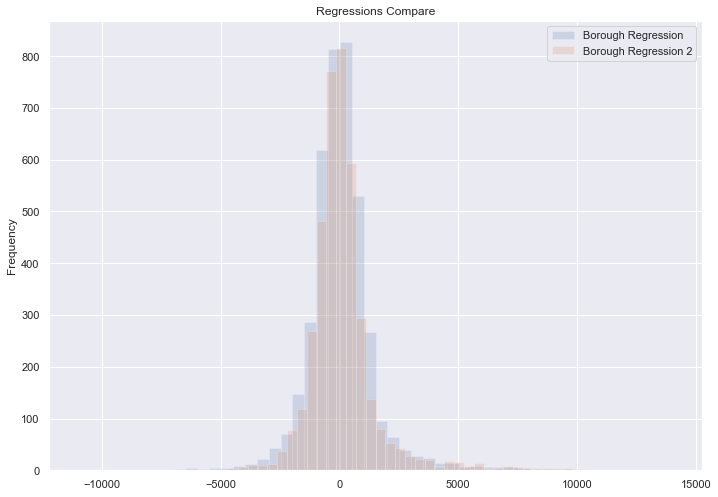

In [320]:
fig,ax=plt.subplots()
#(y_train - predictions_2).plot(ax=ax, kind = 'hist', bins=50, alpha = 0.2, label = 'All Regression')
(y_train - borough_preds).plot(ax=ax, kind = 'hist', bins=50, alpha = 0.2, label = 'Borough Regression')
(y_train - np.array(predictions_borough_2.tolist()).reshape((4000))).plot(ax=ax, kind = 'hist', bins=50, alpha = 0.2, label = 'Borough Regression 2')
ax.legend()
ax.set_title('Regressions Compare')

In [307]:
mean_squared_error(y_train, borough_preds, squared = False)

3781.8586155446287